# Resampling Datatime Data Core
- Steven Phillips
- February 3, 2023

- Part 1: Load the weather data from London from Kaggle and create a datetime index.
- Part 2: Answer 2 Questions using Visualizations and the Correct Frequency Data.

In [1]:
# imports

import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.ticker as mticks
import matplotlib.dates as mdates

## Part 1: Load the data and make a datetime index

In [2]:
# load in the data

df = pd.read_csv('/Users/steve/Documents/GitHub/Resampling-Datetime-Data-Core/Data/london_weather_MODIFIED - london_weather_MODIFIED.csv')
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       14938 non-null  float64
 2   sunshine          14957 non-null  float64
 3   global_radiation  14939 non-null  float64
 4   max_temp          14951 non-null  float64
 5   mean_temp         14922 non-null  float64
 6   min_temp          14955 non-null  float64
 7   precipitation     14951 non-null  float64
 8   pressure          14953 non-null  float64
 9   snow_depth        13589 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0


### 1. Convert the date column to datetime dtype:

In [3]:
# Add a datetime column based on the string in the "date" column

df['datetime'] = pd.to_datetime(df['date'], format = '%Y%m%d')
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              15341 non-null  int64         
 1   cloud_cover       14938 non-null  float64       
 2   sunshine          14957 non-null  float64       
 3   global_radiation  14939 non-null  float64       
 4   max_temp          14951 non-null  float64       
 5   mean_temp         14922 non-null  float64       
 6   min_temp          14955 non-null  float64       
 7   precipitation     14951 non-null  float64       
 8   pressure          14953 non-null  float64       
 9   snow_depth        13589 non-null  float64       
 10  datetime          15341 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 1.3 MB


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,datetime
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0,1979-01-01
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0,1979-01-02
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0,1979-01-03


### 2. Set the date column as the index:

In [4]:
# set the datetime as the index

df = df.set_index('datetime')
df

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
datetime,,,,,,,,,,
1979-01-01,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...,...
2020-12-27,20201227,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
2020-12-28,20201228,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
2020-12-29,20201229,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN


In [5]:
# check the index

df.index

DatetimeIndex(['1979-01-01', '1979-01-02', '1979-01-03', '1979-01-04',
               '1979-01-05', '1979-01-06', '1979-01-07', '1979-01-08',
               '1979-01-09', '1979-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='datetime', length=15341, freq=None)

### 3. Filter out only the required data:

#### Keep only data from the year 2000 or later.

In [6]:
# filter data 2000 and later

df_analysis = df.loc['2000':].copy()
df_analysis.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
datetime,,,,,,,,,,
2000-01-01,20000101,7.0,0.4,18.0,10.8,7.0,4.9,0.0,102450.0,0.0
2000-01-02,20000102,7.0,0.7,20.0,11.5,7.9,5.0,0.2,102530.0,0.0
2000-01-03,20000103,8.0,0.0,13.0,9.5,9.4,7.2,6.0,101860.0,0.0
2000-01-04,20000104,5.0,2.9,34.0,11.0,7.0,4.4,0.2,101480.0,0.0
2000-01-05,20000105,5.0,1.3,25.0,10.8,6.4,1.9,0.8,101420.0,0.0


#### Keep only the following features:

- precipitation
- mean_temp
- min_temp
- max_temp
- snow_depth

In [7]:
# filter features

drop_features = ['date', 'cloud_cover', 'sunshine', 'global_radiation', 'pressure']

for i in drop_features:
    
    df_analysis = df_analysis.drop(columns = [i])

df_analysis.head()

,max_temp,mean_temp,min_temp,precipitation,snow_depth
datetime,,,,,
2000-01-01,10.8,7.0,4.9,0.0,0.0
2000-01-02,11.5,7.9,5.0,0.2,0.0
2000-01-03,9.5,9.4,7.2,6.0,0.0
2000-01-04,11.0,7.0,4.4,0.2,0.0
2000-01-05,10.8,6.4,1.9,0.8,0.0


### 4. Impute any missing values:

In [8]:
# df info

df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7671 entries, 2000-01-01 to 2020-12-31
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   max_temp       7281 non-null   float64
 1   mean_temp      7252 non-null   float64
 2   min_temp       7285 non-null   float64
 3   precipitation  7281 non-null   float64
 4   snow_depth     5919 non-null   float64
dtypes: float64(5)
memory usage: 359.6 KB


In [9]:
# missing values

df_analysis.isna().sum()

max_temp          390
mean_temp         419
min_temp          386
precipitation     390
snow_depth       1752
dtype: int64

In [10]:
# interpolate temperature features

df_analysis['mean_temp'] = df_analysis['mean_temp'].interpolate()
df_analysis['max_temp'] = df_analysis['max_temp'].interpolate()
df_analysis['min_temp'] = df_analysis['min_temp'].interpolate()

In [11]:
df_analysis.isna().sum()

max_temp            0
mean_temp           0
min_temp            0
precipitation     390
snow_depth       1752
dtype: int64

In [12]:
# fill preciptation & snow features with 0

df_analysis['precipitation'] = df_analysis['precipitation'].fillna(0)
df_analysis['snow_depth'] = df_analysis['snow_depth'].fillna(0)

In [13]:
df_analysis.isna().sum()

max_temp         0
mean_temp        0
min_temp         0
precipitation    0
snow_depth       0
dtype: int64

## Part 2: Answer 2 Questions using Visualizations and the Correct Frequency Data



In [14]:
# copy the df

df_analysis_copy = df_analysis.copy()
df_analysis.head()

,max_temp,mean_temp,min_temp,precipitation,snow_depth
datetime,,,,,
2000-01-01,10.8,7.0,4.9,0.0,0.0
2000-01-02,11.5,7.9,5.0,0.2,0.0
2000-01-03,9.5,9.4,7.2,6.0,0.0
2000-01-04,11.0,7.0,4.4,0.2,0.0
2000-01-05,10.8,6.4,1.9,0.8,0.0


### Q1. What month had the most precipitation between 2000 through 2010?

- Resample the data as Monthly frequency
- Find the date and corresponding value for the max precipitation
- Plot the feature and time period corresponding to the question
- Determine the date and value for the most precipitation (the max precipitation)
- Add a vertical line at this date with a label that says the date and the max precipitation value (include a legend)

In [15]:
# filter years 2000-2010

df_maxprec = df_analysis.loc['2000':'2010',].copy()
df_maxprec.head()


,max_temp,mean_temp,min_temp,precipitation,snow_depth
datetime,,,,,
2000-01-01,10.8,7.0,4.9,0.0,0.0
2000-01-02,11.5,7.9,5.0,0.2,0.0
2000-01-03,9.5,9.4,7.2,6.0,0.0
2000-01-04,11.0,7.0,4.4,0.2,0.0
2000-01-05,10.8,6.4,1.9,0.8,0.0


In [16]:
# actual date of/and max value

actual_date_max_prec = df_maxprec['precipitation'].idxmax()
actual_value_max_prec = df_maxprec['precipitation'].max()

print(f"The maximum precipitation of {actual_value_max_prec} inches occurred {actual_date_max_prec.strftime('%B %d, %Y')}.")

The maximum precipitation of 36.6 inches occurred October 29, 2000.


In [17]:
# resample df monthly

df_maxprec_MS_res = df_maxprec.resample("MS").max()
df_maxprec_MS_res.name = 'Resampled'
df_maxprec_MS_res.head()

,max_temp,mean_temp,min_temp,precipitation,snow_depth
datetime,,,,,
2000-01-01,12.9,11.6,10.4,6.0,0.0
2000-02-01,13.8,10.4,9.1,16.8,0.0
2000-03-01,16.6,13.9,11.2,7.2,0.0
2000-04-01,18.7,13.9,10.2,17.2,0.0
2000-05-01,26.6,21.0,15.4,19.0,0.0


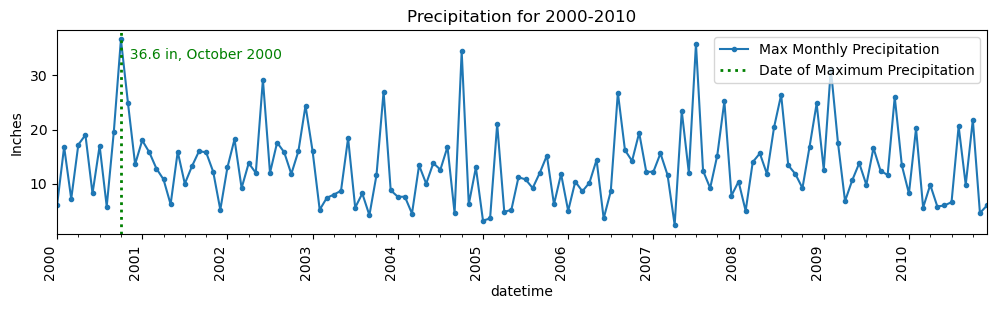

In [18]:
# make the fig/axis

fig, ax = plt.subplots(figsize=(12,3))

ax.set(title='Precipitation for 2000-2010', ylabel='Inches')


# customize major ticks every year
major_loc =  mdates.MonthLocator(interval = 31)
major_fmt = mdates.DateFormatter("%Y")

ax.xaxis.set_major_locator(major_loc)
ax.xaxis.set_major_formatter(major_fmt)


# customize minor ticks every 3 months no label
minor_loc =  mdates.MonthLocator(interval=3)
ax.xaxis.set_minor_locator(minor_loc)

# plot time series with Pandas
df_maxprec_MS_res['precipitation'].plot(style='.-', ax=ax, label = 'Max Monthly Precipitation')


# Final xdate adjustment
fig = ax.get_figure()
fig.autofmt_xdate(which='major',rotation=90)

# combine max date and value for vertical line label
max_date = actual_date_max_prec.strftime('%B' + ' ' + '%Y')
max_value = str(actual_value_max_prec)
max_label = max_value + ' in, ' + max_date

# vertical line for date max precipitation
ax.axvline(actual_date_max_prec, color='g', lw=2, ls=':', label='Date of Maximum Precipitation')
plt.text(actual_date_max_prec,33.0, '  ' + max_label, color = 'g')


ax.legend();

### Q2. Which year between 2000-2020 had the coolest average temperature?

- Resample the data as Yearly fequency.
- Find the date and corresponding value for the max mean temp.
- Plot the feature and time period.
- Determine the date and value for the lowest mean temp.
- Add a vertical line at this date with a date and max precipitation value label.
- What was the temperature?

In [19]:
# dataframe for 2000-2020

df_meantemp = df_analysis.loc['2000':'2020',].copy()
df_meantemp.head()

,max_temp,mean_temp,min_temp,precipitation,snow_depth
datetime,,,,,
2000-01-01,10.8,7.0,4.9,0.0,0.0
2000-01-02,11.5,7.9,5.0,0.2,0.0
2000-01-03,9.5,9.4,7.2,6.0,0.0
2000-01-04,11.0,7.0,4.4,0.2,0.0
2000-01-05,10.8,6.4,1.9,0.8,0.0


In [20]:
# actual date of/and minimum mean temp

actual_date_mean_temp = df_meantemp['mean_temp'].idxmin()
actual_min_mean_temp = df_meantemp['mean_temp'].min()

print(f"The minimum mean temperature of {actual_min_mean_temp} degrees occurred {actual_date_mean_temp.strftime('%B %d, %Y')}.")

The minimum mean temperature of -4.1 degrees occurred December 20, 2010.


In [21]:
# resample the data with Yearly frequency

df_mean_YS_res = df_meantemp.resample("YS").mean().round(2)
df_mean_YS_res.name = 'Resampled'
df_mean_YS_res.head()

,max_temp,mean_temp,min_temp,precipitation,snow_depth
datetime,,,,,
2000-01-01,15.14,11.58,8.00,1.97,0.01
2001-01-01,15.04,11.33,7.65,1.85,0.00
2002-01-01,15.82,12.08,8.43,2.06,0.00
2003-01-01,16.36,12.11,7.90,1.26,0.02
2004-01-01,15.55,11.90,8.23,1.62,0.01


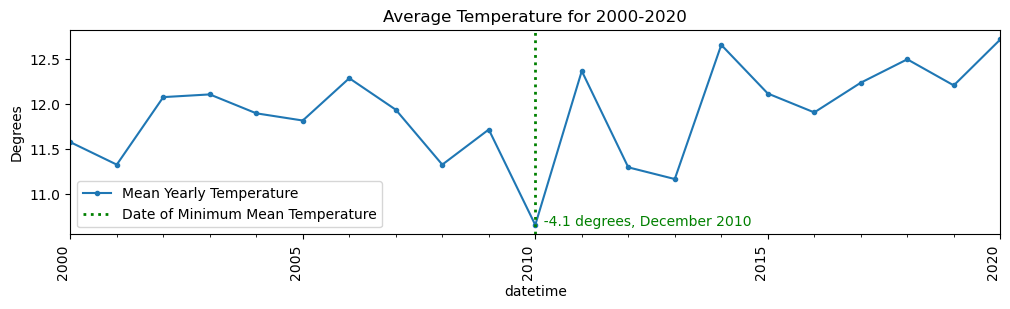

In [22]:
# make the fig/axis
fig, ax = plt.subplots(figsize=(12,3))


ax.set(title='Average Temperature for 2000-2020', ylabel='Degrees')

# customize major ticks every 5 years
major_loc =  mdates.YearLocator(5)
major_fmt = mdates.DateFormatter("%Y")

ax.xaxis.set_major_locator(major_loc)
ax.xaxis.set_major_formatter(major_fmt)

# customize minor ticks every 1 year no label
minor_loc =  mdates.YearLocator(1)
ax.xaxis.set_minor_locator(minor_loc)

# plot time series with Pandas
df_mean_YS_res['mean_temp'].plot(style='.-', ax=ax, label = 'Mean Yearly Temperature')

# Final xdate adjustment
fig = ax.get_figure()
fig.autofmt_xdate(which='major',rotation=90)

# combine date and value for vertical line
min_date = actual_date_mean_temp.strftime('%B' + ' ' + '%Y')
min_value = str(actual_min_mean_temp)
min_label = min_value + ' degrees, ' + min_date


# vertical line for date min mean temperature
ax.axvline(actual_date_mean_temp, color='g', lw=2, ls=':', label='Date of Minimum Mean Temperature')
plt.text(actual_date_mean_temp, 10.65, '  ' + min_label, color = 'g')


ax.legend();